In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as Fun

In [2]:
short_raw_text = '''Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers.
Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.
The use of multi-sense embeddings is known to improve performance in several NLP tasks, such as part-of-speech tagging, semantic relation identification, and semantic relatedness.
However, tasks involving named entity recognition and sentiment analysis seem not to benefit from a multiple vector representation.'''.split()
vocab = set(short_raw_text)
vocab_size = len(vocab)

word_to_index = {w: idx for (idx, w) in enumerate(vocab)}
index_to_word = {idx: w for (idx, w) in enumerate(vocab)}

print(word_to_index)
print(index_to_word)

{'a': 0, 'with': 1, 'embeddings': 2, 'embedding': 3, 'words': 4, 'not': 5, 'relatedness.': 6, 'known': 7, 'for': 8, 'to': 9, 'are': 10, 'where': 11, 'word': 12, 'sentiment': 13, 'named': 14, 'recognition': 15, 'of': 16, 'dimensions': 17, 'representation.': 18, 'The': 19, 'vector': 20, 'vocabulary': 21, 'semantic': 22, 'per': 23, 'improve': 24, 'it': 25, 'mathematical': 26, 'tasks': 27, 'techniques': 28, 'and': 29, 'analysis': 30, 'multiple': 31, 'feature': 32, 'NLP': 33, 'such': 34, 'modeling': 35, 'continuous': 36, 'as': 37, 'is': 38, 'set': 39, 'much': 40, 'several': 41, 'in': 42, 'entity': 43, 'learning': 44, 'use': 45, 'numbers.': 46, 'the': 47, 'name': 48, 'phrases': 49, 'However,': 50, 'seem': 51, 'from': 52, 'language': 53, 'involves': 54, 'dimension.': 55, 'involving': 56, 'natural': 57, 'multi-sense': 58, 'processing': 59, 'tasks,': 60, 'collective': 61, 'many': 62, 'relation': 63, 'real': 64, 'identification,': 65, 'Conceptually': 66, 'mapped': 67, 'vectors': 68, 'or': 69, 'W

In [3]:
data = []
labels = []
n = 0
for i in range(2, len(short_raw_text) - 2):
  n +=1
  context_vec = [word_to_index[short_raw_text[i - 2]], word_to_index[short_raw_text[i - 1]],
                word_to_index[short_raw_text[i + 1]], word_to_index[short_raw_text[i + 2]]]
  context_vec = torch.tensor(context_vec, dtype=torch.long)
  context = Fun.one_hot(context_vec, num_classes = vocab_size)
  context = torch.sum(context, dim = 0, keepdim = True)
  target = torch.tensor(word_to_index[short_raw_text[i]])
  labels.append(target)
  target = Fun.one_hot(target, num_classes = vocab_size)
  data.append((context, target))
print(n)

96


In [4]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
      super(CBOW, self).__init__()
      self.L1 = nn.Linear(vocab_size, embedding_dim, bias = False)
      self.L3 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
      out = Fun.relu(self.L1(x))
      out = Fun.softmax(self.L3(out), dim = 1)
      return out

In [20]:
model = CBOW(vocab_size, 32)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
loss_func = []
accuracy = []

for i in range(0,200):
  loss = 0
  acc = 0
  for k, (context, target) in enumerate(data):
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)
  if(i%10 == 0):
    print(loss)
    print(acc/n*100)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(417.0137, grad_fn=<AddBackward0>)
2.083333333333333
tensor(415.7169, grad_fn=<AddBackward0>)
28.125
tensor(407.8990, grad_fn=<AddBackward0>)
30.208333333333332
tensor(385.4276, grad_fn=<AddBackward0>)
59.375
tensor(354.5349, grad_fn=<AddBackward0>)
79.16666666666666
tensor(338.3727, grad_fn=<AddBackward0>)
88.54166666666666
tensor(333.0846, grad_fn=<AddBackward0>)
90.625
tensor(331.1176, grad_fn=<AddBackward0>)
92.70833333333334
tensor(329.5444, grad_fn=<AddBackward0>)
93.75
tensor(328.4622, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.2981, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.2261, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.1991, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.1855, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.1749, grad_fn=<AddBackward0>)
94.79166666666666
tensor(328.1500, grad_fn=<AddBackward0>)
94.79166666666666
tensor(327.2066, grad_fn=<AddBackward0>)
95.83333333333334
tensor(327.1997, grad_fn=<AddBackward0>)


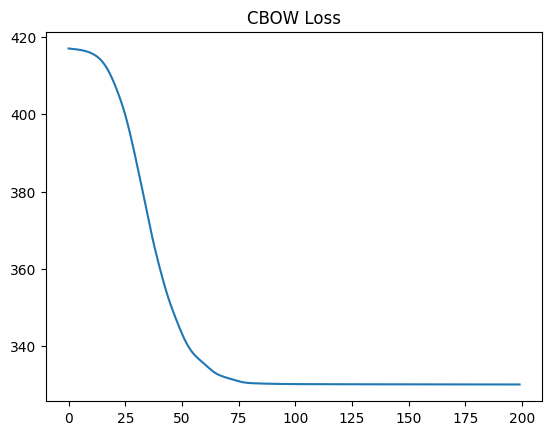

In [7]:
plt.plot(loss_func)
plt.title("CBOW Loss")
plt.show()

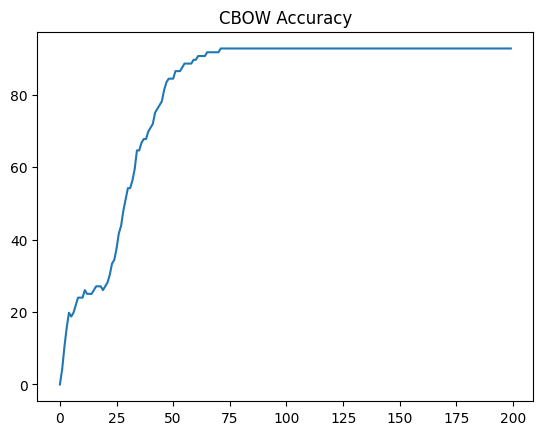

In [8]:
plt.plot(accuracy)
plt.title("CBOW Accuracy")
plt.show()

In [9]:
txt = input('Enter a text : ')
txt1 = txt.split()
vec = [word_to_index[txt1[0]], word_to_index[txt1[1]], word_to_index[txt1[2]], word_to_index[txt1[3]]]
vec = torch.tensor(vec, dtype = torch.long)
cntxt = Fun.one_hot(vec, num_classes = vocab_size)
cntxt = torch.sum(cntxt, dim = 0, keepdim = True)
output = model(cntxt.float())
_, predicted = torch.max(output.data , 1)
print('Predicted : ', index_to_word[int(predicted)])

Enter a text : natural language where words
Predicted :  processing


In [10]:
for name, param in model.named_parameters():
  if 'L1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

Embedding shape :  (77, 32)
[[ 0.67852515  0.5493608   0.8175276  ...  0.4014666  -0.20646293
   0.3631306 ]
 [ 0.5202488   0.7074918  -0.6357794  ...  0.80904484  0.7087576
  -0.54456246]
 [-0.11166006 -0.06221247  0.47269326 ...  0.14843376  0.5359424
   0.57357174]
 ...
 [-0.19945286  0.81640106 -0.71889174 ...  0.5959656  -0.3694424
   0.63722026]
 [ 0.6748492  -0.38312155 -0.58439505 ... -0.36986476 -0.2544609
  -0.0411596 ]
 [ 0.14632495  0.44602224  0.5732406  ...  0.68463326  0.31199375
   0.67335033]]


In [12]:
w1 = input('Enter word-1 : ')
w2 = input('Enter word-2 : ')
w3 = input('Enter word-3 : ')
cos_dist1 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w2]])
cos_dist2 = np.dot(embed[word_to_index[w2]], embed[word_to_index[w3]])
cos_dist3 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w3]])
print('The cosine distance between word-1 and word-2 is : ', cos_dist1)
print('The cosine distance between word-2 and word-3 is : ', cos_dist2)
print('The cosine distance between word-1 and word-3 is : ', cos_dist3)

Enter word-1 : language
Enter word-2 : Word
Enter word-3 : embedding
The cosine distance between word-1 and word-2 is :  1.3620954
The cosine distance between word-2 and word-3 is :  2.6953797
The cosine distance between word-1 and word-3 is :  1.0316623


In [13]:
def PCA(embedding):
  corr = np.corrcoef(embedding)
  values,vectors = np.linalg.eig(corr)
  args = (-values).argsort()
  values = vectors[args]
  vectors = vectors[:, args]
  new_vectors=vectors[:,:2]
  return np.multiply(embedding[:,:2], new_vectors)

(77, 2)


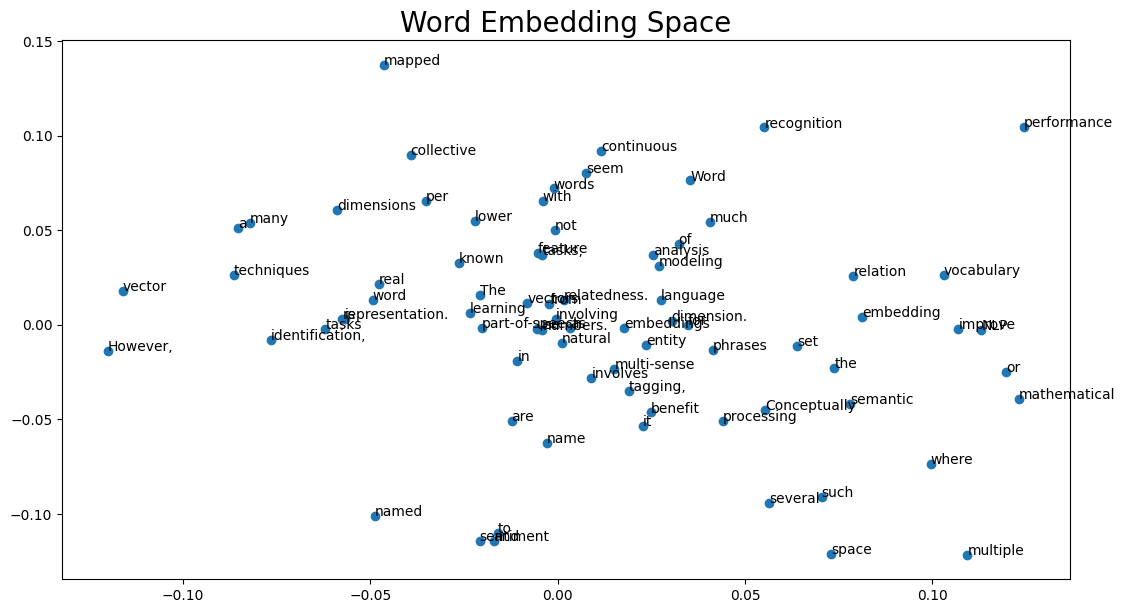

In [15]:
pca = PCA(embed)
print(pca.shape)
plt.figure(figsize=(13,7))
plt.scatter(pca[:,0], pca[:,1])
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))